In [14]:
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import numpy as np
import os
import utils_fom

In [15]:
dir="/lstore/cms/boletti/ntuples/"
filename="2018Data_passPreselection_passSPlotCuts_mergeSweights.root"
filename2="MC_JPSI_2018_preBDT_Nov21.root"

data = uproot.open(dir+filename)
data_mc=uproot.open(dir+filename2)

Tree=data["ntuple"]
Tree_mc=data_mc["ntuple"]

variables_path = 'vars.csv'
df = pd.read_csv(variables_path, header=0)
df.columns = df.columns.str.strip()

In [16]:
def get_signal_normal(v,sel):
    background=Tree.arrays(v,cut=sel,library="pd")
    signal=Tree_mc.arrays(v,cut=sel,library="pd")
    return signal,background

def get_signal_composite(v,sel):
    signal=Tree_mc.arrays(v,aliases={v:v},cut=sel,library="pd")
    background=Tree.arrays(v,aliases={v:v},cut=sel,library="pd")
    return signal,background

In [17]:
v="bLBS/bLBSE"
v="bLBS"
v="bVtxCL"
v="kstTrmPt"
v="kstTrpPt"
v="mu1Pt"
v="mu2Pt"

In [22]:
def calc_fom(v,signal,background,minv,maxv,fs,fb,show_upper,legend,xlim,ylim):
    #os.chdir("/user/u/u23madalenablanc/flavour-anomalies/SummerLIP23/"+folder)

    num_points=200

    while True:
        try:
            step = (maxv - minv) / (num_points - 1)
            var_range = np.arange(minv, maxv , step)

            break
        except ValueError:
            minv=signal[v].min()
            maxv=signal[v].max()
    
    fom=[]
    fom_opposite=[]

    for i in var_range:
        s=0;b=0;f=0
        #print(i)

        #print(signal.size)
        s = np.sum(signal[v] > i)
        s=s*fs
        b = np.sum(background[v] > i)
        b=b*fb

        s_opposite=np.sum(signal[v]<i)
        s_opposite*=fs
        b_opposite = np.sum(background[v] < i)
        b_opposite*=fb


        f=s/(s+b)**0.5
        #print(str(i)+" , figure of merit:"+str(f))
        fom.append(f)

        if (s_opposite>0 or b_opposite>0):
            fom_opposite.append(s_opposite/(s_opposite+b_opposite)**0.5)
        else:
            fom_opposite.append(0)


    if show_upper==1:
        label="upper cut"
        fom_to_plot=fom_opposite
    else:
        label="lower cut"
        fom_to_plot=fom


    os.chdir("/user/u/u23madalenablanc/flavour-anomalies/special_plots/")

    plt.figure()
    
    
    plt.plot(var_range,fom_to_plot,label=label)

    #plt.title(f"FOM for: {v}")
    plt.legend()
    plt.xlabel(legend)
    plt.ylabel("FOM")
    plt.xlim(xlim)
    plt.ylim(ylim)

    while True:
        try:
            plt.savefig(v+'_fom_special.png')
            break
        except FileNotFoundError:
            print("bad name")
            v=v.replace("/", "_div_")   

In [19]:
left_edge,right_edge,fb,fs=utils_fom.get_factors("/user/u/u23madalenablanc/flavour-anomalies/SummerLIP23/Fit results/B0Fit_3.5sigma_results.txt")

sel="(tagged_mass<" + left_edge+ ") | (tagged_mass>" +right_edge + ")"

In [20]:
v="bLBS/bLBSE"
var_range_x=[0,15]
var_range_y=[160,180]

In [24]:
v="bLBS"
var_range_x=[0,0.1]
var_range_y=[160,180]

In [26]:
v="bVtxCL"
var_range_x=[0,0.07]
var_range_y=[160,180]

In [30]:
v="kstTrkmPt"
var_range_x=[0,2]
var_range_y=[160,180]

In [32]:
v="kstTrkpPt"
var_range_x=[0,2]
var_range_y=[160,180]

In [34]:
v="mu1Pt"
var_range_x=[0,8]
var_range_y=[160,180]

In [36]:
v="mu2Pt"
var_range_x=[0,7]
var_range_y=[160,180]

0.0 22.0


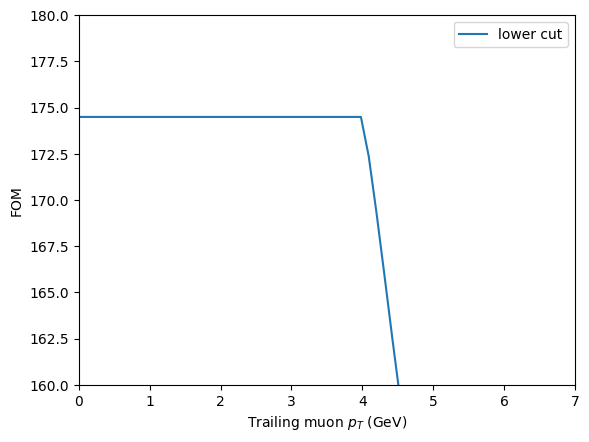

In [37]:
composite_value = df.loc[df["var_name"] == v, "composite"].iloc[0]
minv= df.loc[df["var_name"] == v, "min"].iloc[0]
maxv= df.loc[df["var_name"] == v, "max"].iloc[0]
show_upper=df.loc[df["var_name"] == v, "show_upper"].iloc[0]
legend=df.loc[df["var_name"] == v, "legend"].iloc[0]

print(minv,maxv)

if composite_value==0:
    signal,back=get_signal_normal(v,sel)
elif (composite_value)==1:
    signal,back=get_signal_composite(v,sel)
calc_fom(v,signal,back,minv,maxv,fs,fb,show_upper,legend,var_range_x,var_range_y)